<a href="https://colab.research.google.com/github/ProstoRav/Netology/blob/main/%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BF%D0%BE_%D1%82%D0%B5%D0%BC%D0%B5_%C2%AB%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B%2C_%D0%BE%D0%B1%D1%89%D0%B0%D1%8F_%D1%82%D0%B5%D0%BE%D1%80%D0%B8%D1%8F%C2%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller

import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

import warnings
warnings.filterwarnings("ignore")

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Загрузка данных
sales_of_company_x = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netology/4. Временные ряды/Лекция_tsml + ДЗ/Series/monthly-sales-of-company-x-jan-6.csv')
robberies_in_boston = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netology/4. Временные ряды/Лекция_tsml + ДЗ/Series/monthly-boston-armed-robberies-j.csv')
airlines_passengers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netology/4. Временные ряды/Лекция_tsml + ДЗ/Series/international-airline-passengers.csv')
mean_monthly_temp = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netology/4. Временные ряды/Лекция_tsml + ДЗ/Series/mean-monthly-air-temperature-deg.csv')
dowjones_closing = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netology/4. Временные ряды/Лекция_tsml + ДЗ/Series/weekly-closings-of-the-dowjones-.csv')
female_births = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Netology/4. Временные ряды/Лекция_tsml + ДЗ/Series/daily-total-female-births-in-cal.csv')

In [ ]:
# Тест Дики-Фуллера
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Визуализация графиков
def tsplot(y, name, lags=None, figsize = rcParams['figure.figsize'], style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='Green', label='Original')
        ts_ax.set_title(name)

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

## 1).monthly-sales-of-company-x-jan-6.csv

In [ ]:
sales_of_company_x

,Month,Count
0,1965-01,154
1,1965-02,96
2,1965-03,73
3,1965-04,49
4,1965-05,36
...,...,...
72,1971-01,628
73,1971-02,308
74,1971-03,324
75,1971-04,248


Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


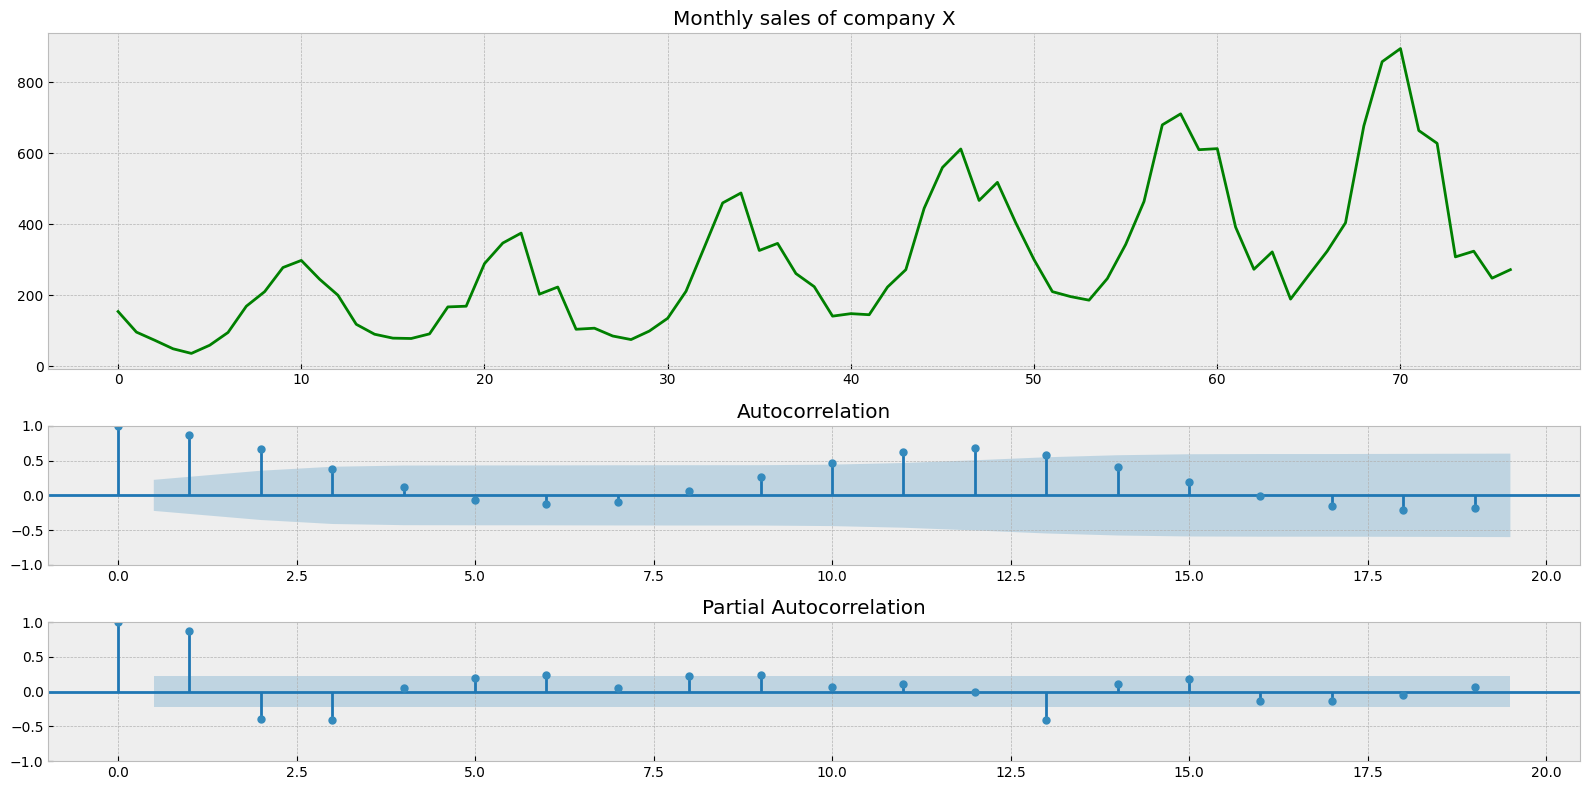

In [ ]:
name = 'Monthly sales of company X'
series = sales_of_company_x['Count']
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                 -0.908049
p-value                         0.785310
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


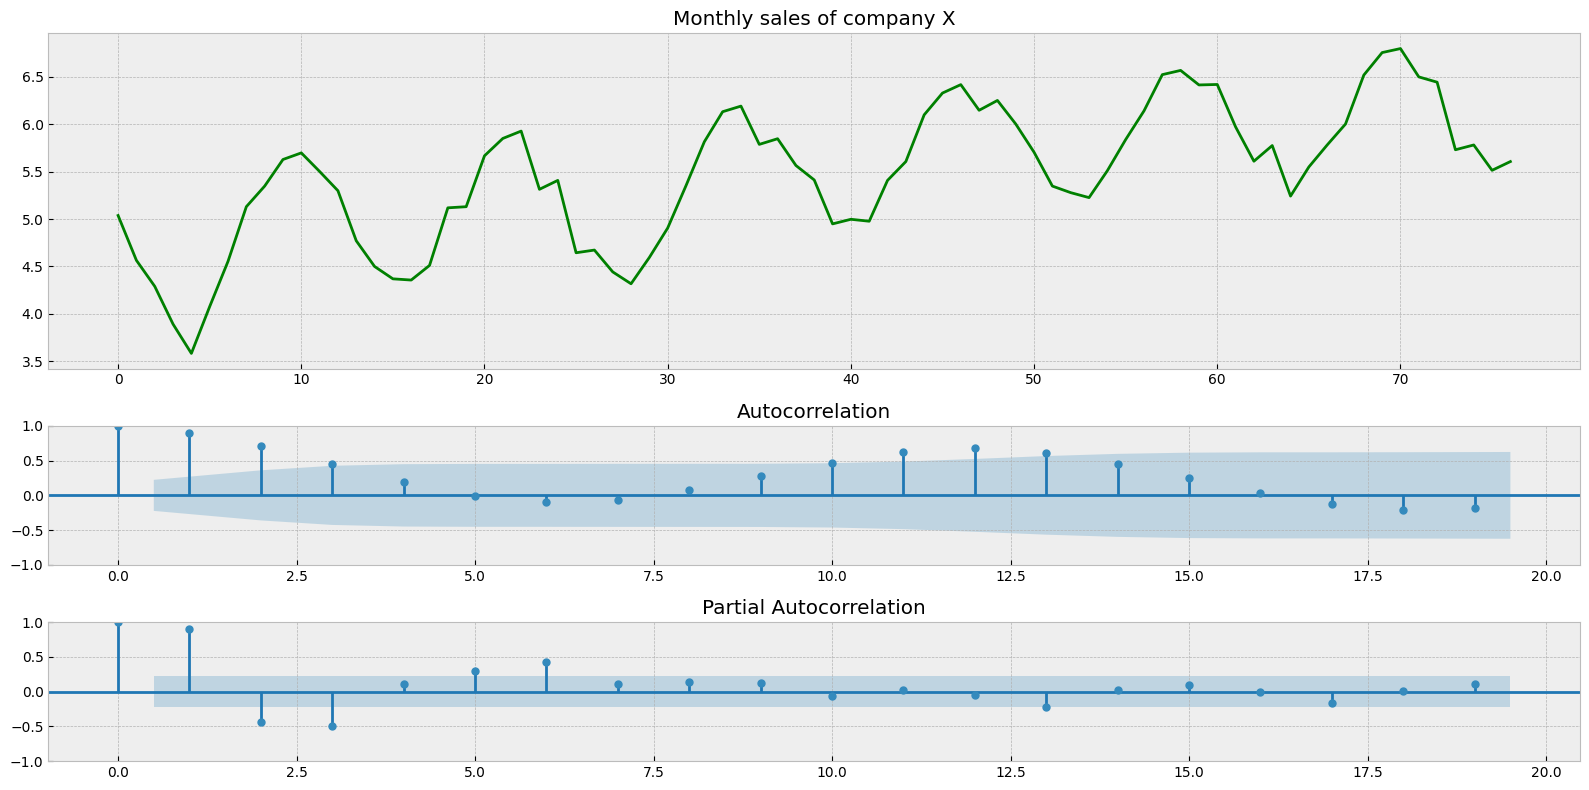

In [ ]:
# Убираем изменение дисперсии с помощью преобразования Бокса-Кокса
series = boxcox(series, 0)
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


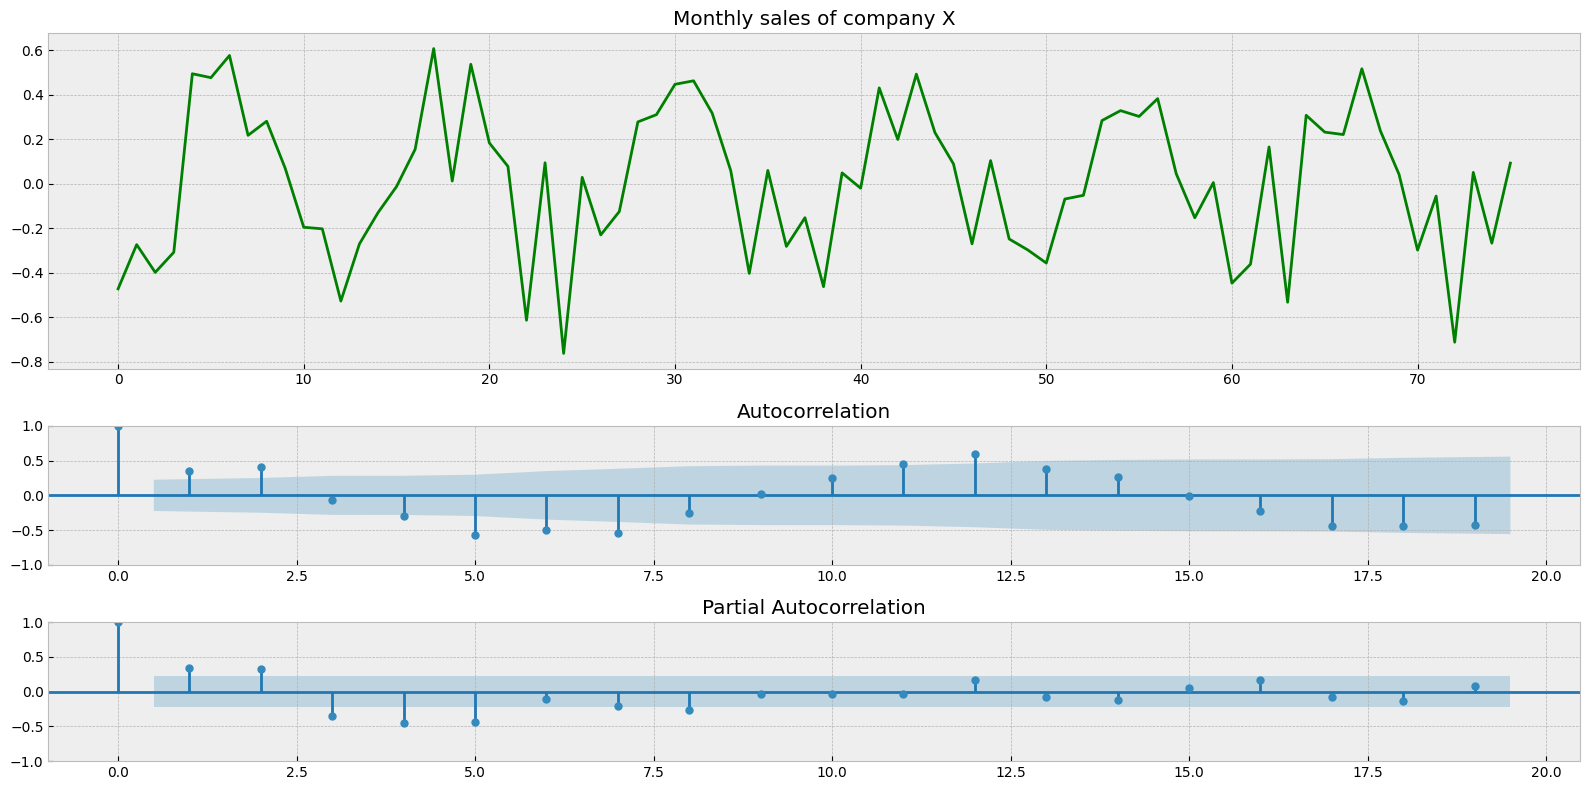

In [ ]:
# Убираем тренд дифференцированием
series = series[1:] - series[:-1]
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                -8.151097e+00
p-value                        9.691366e-13
#Lags Used                     9.000000e+00
Number of Observations Used    6.300000e+01
Critical Value (1%)           -3.538695e+00
Critical Value (5%)           -2.908645e+00
Critical Value (10%)          -2.591897e+00
dtype: float64


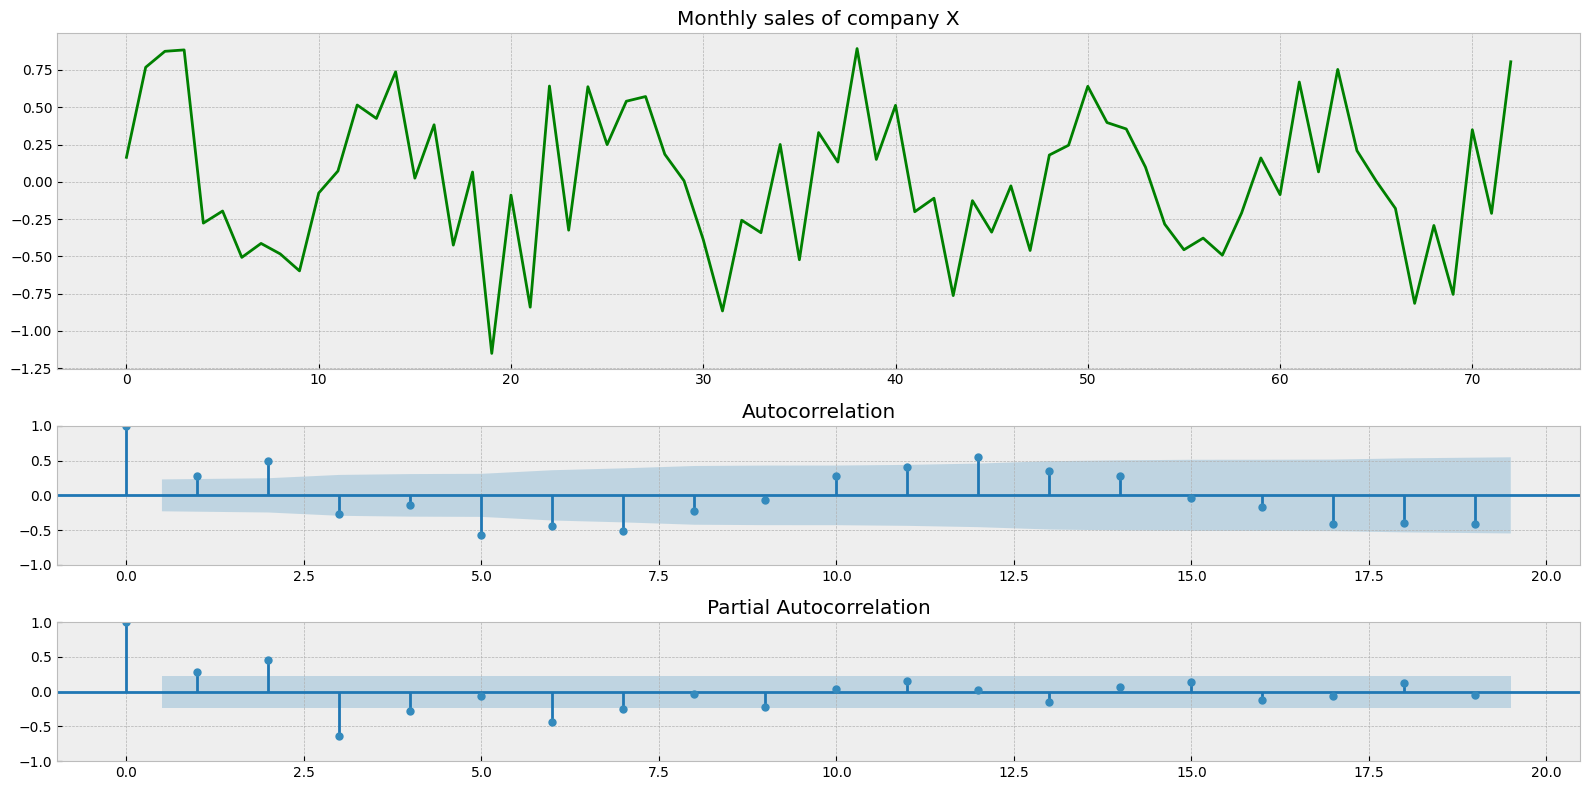

In [ ]:
# Убираем сезонность (3 месяца)
series = series[3:] - series[:-3]
tsplot(series, name)

Временной ряд стал стационарным после преобразования Бокса-Кокса, дифференцирования и сезонного дифференцирования

## 2).monthly-boston-armed-robberies-j.csv

In [ ]:
robberies_in_boston

,Month,Count
0,1966-01,41
1,1966-02,39
2,1966-03,50
3,1966-04,40
4,1966-05,43
...,...,...
113,1975-06,316
114,1975-07,398
115,1975-08,394
116,1975-09,431


Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


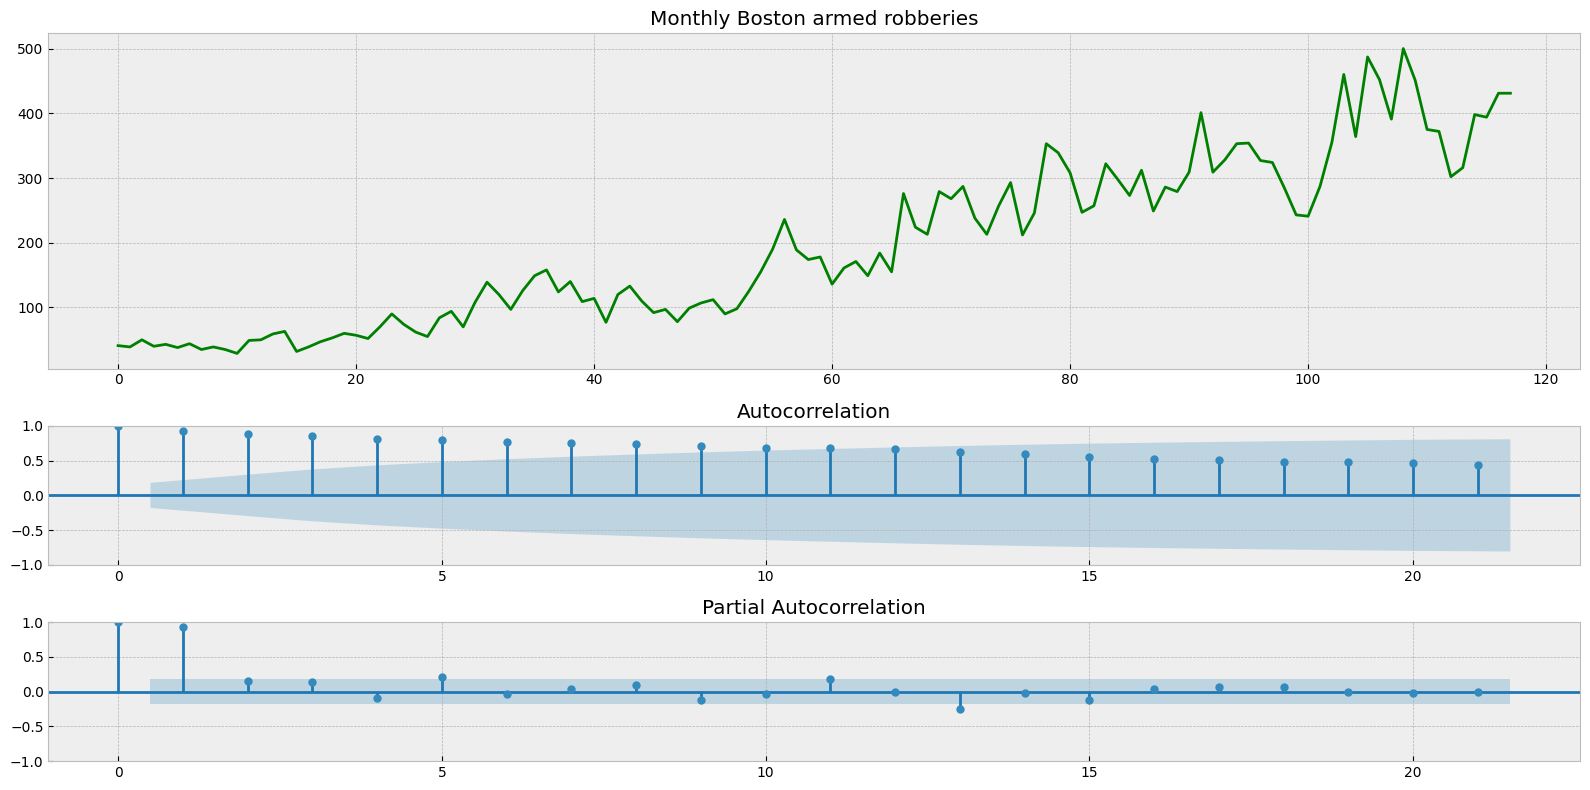

In [ ]:
name = 'Monthly Boston armed robberies'
series = robberies_in_boston['Count']
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


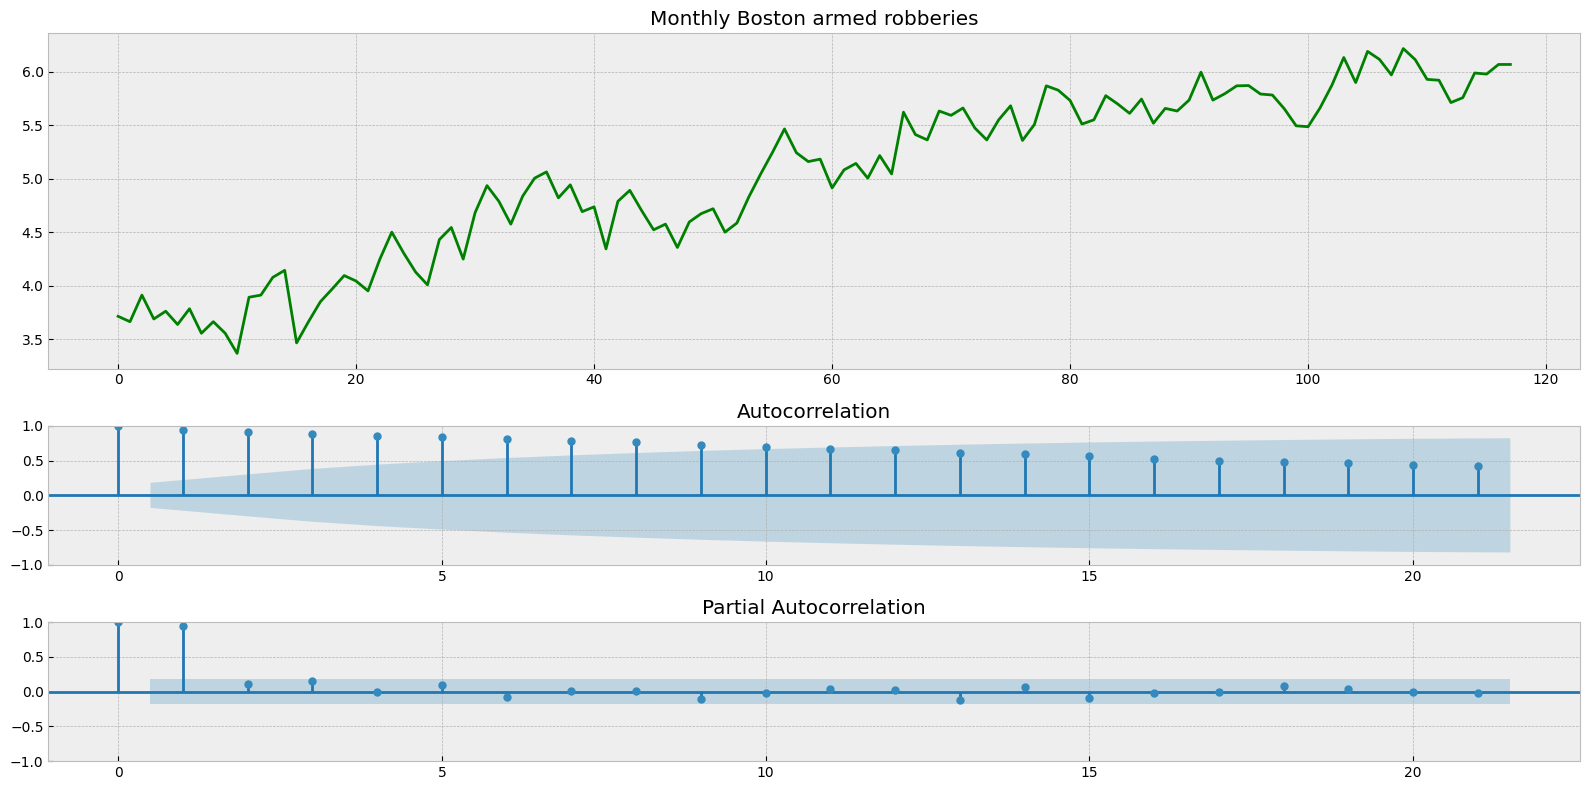

In [ ]:
# Убираем изменение дисперсии с помощью преобразования Бокса-Кокса
series = boxcox(series, 0)
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


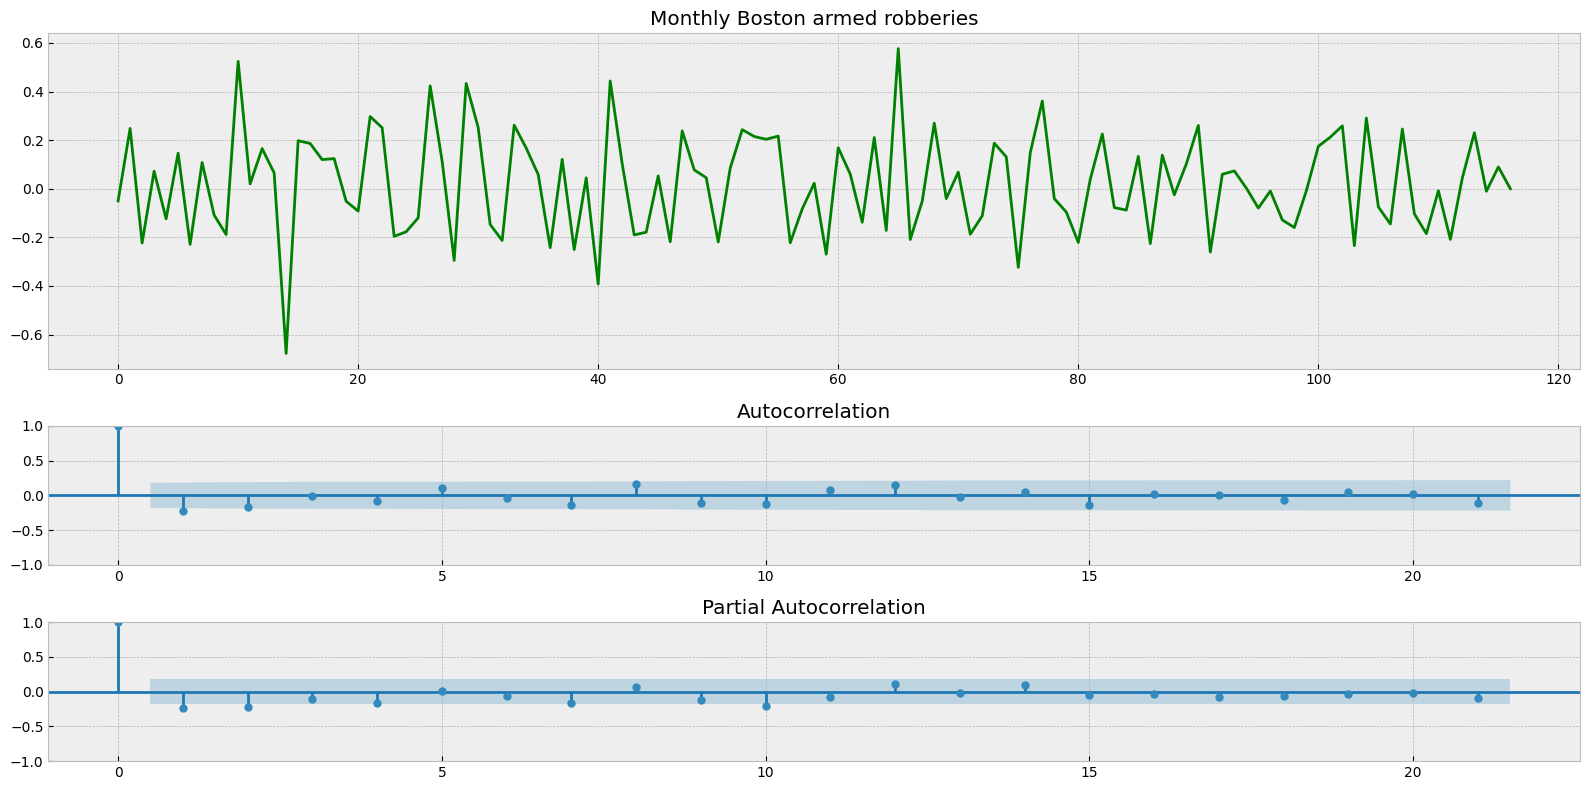

In [ ]:
# Убираем тренд дифференцированием
series = series[1:] - series[:-1]
tsplot(series, name)

Временной ряд стал стационарным после преобразования Бокса-Кокса и дифференцирования

## 3).international-airline-passengers.csv

In [ ]:
airlines_passengers

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


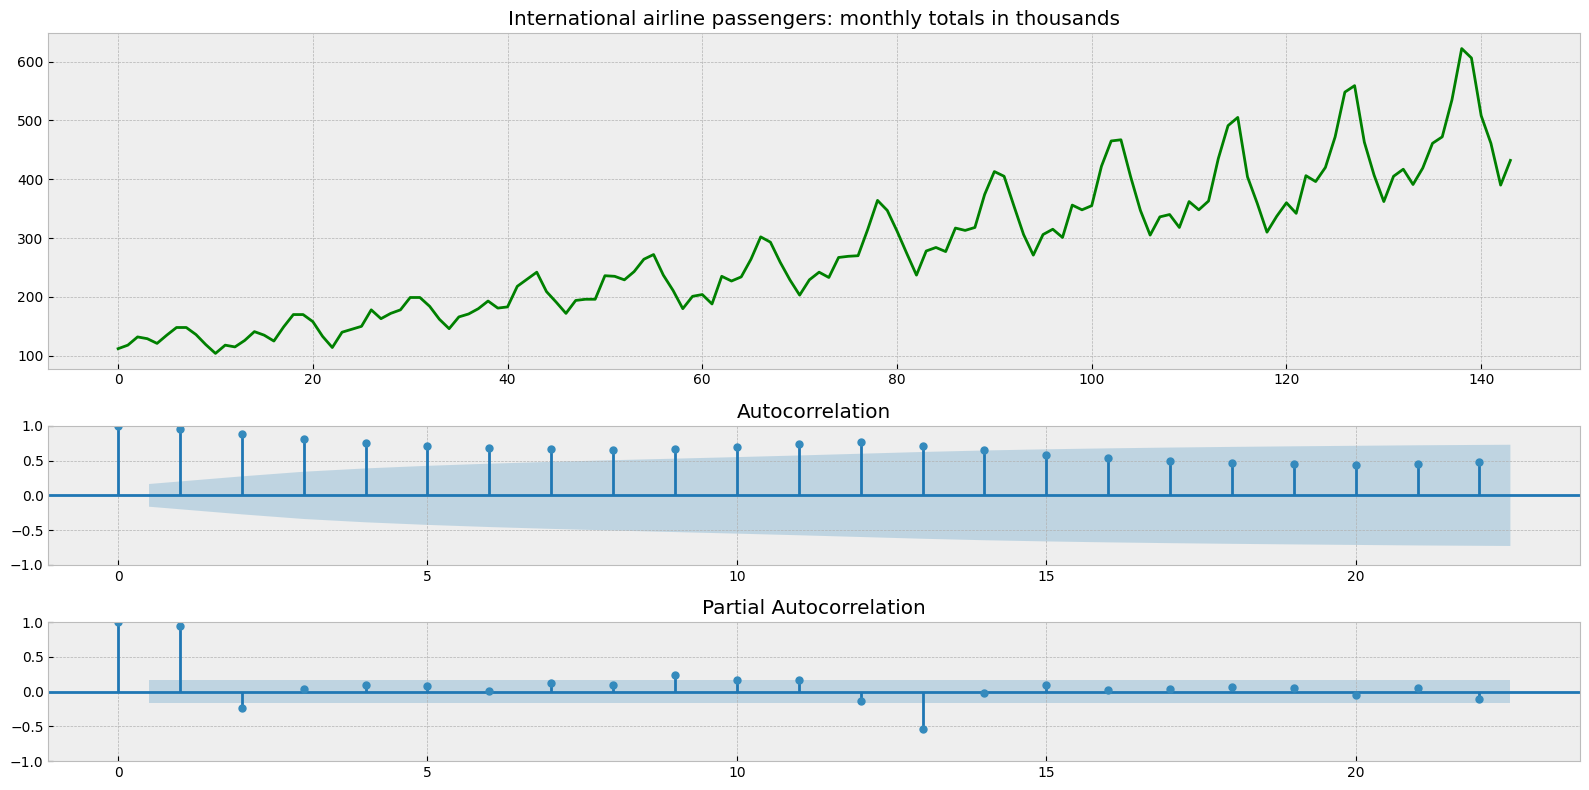

In [ ]:
name = 'International airline passengers: monthly totals in thousands'
series = airlines_passengers['Count']
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                  -1.717017
p-value                          0.422367
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


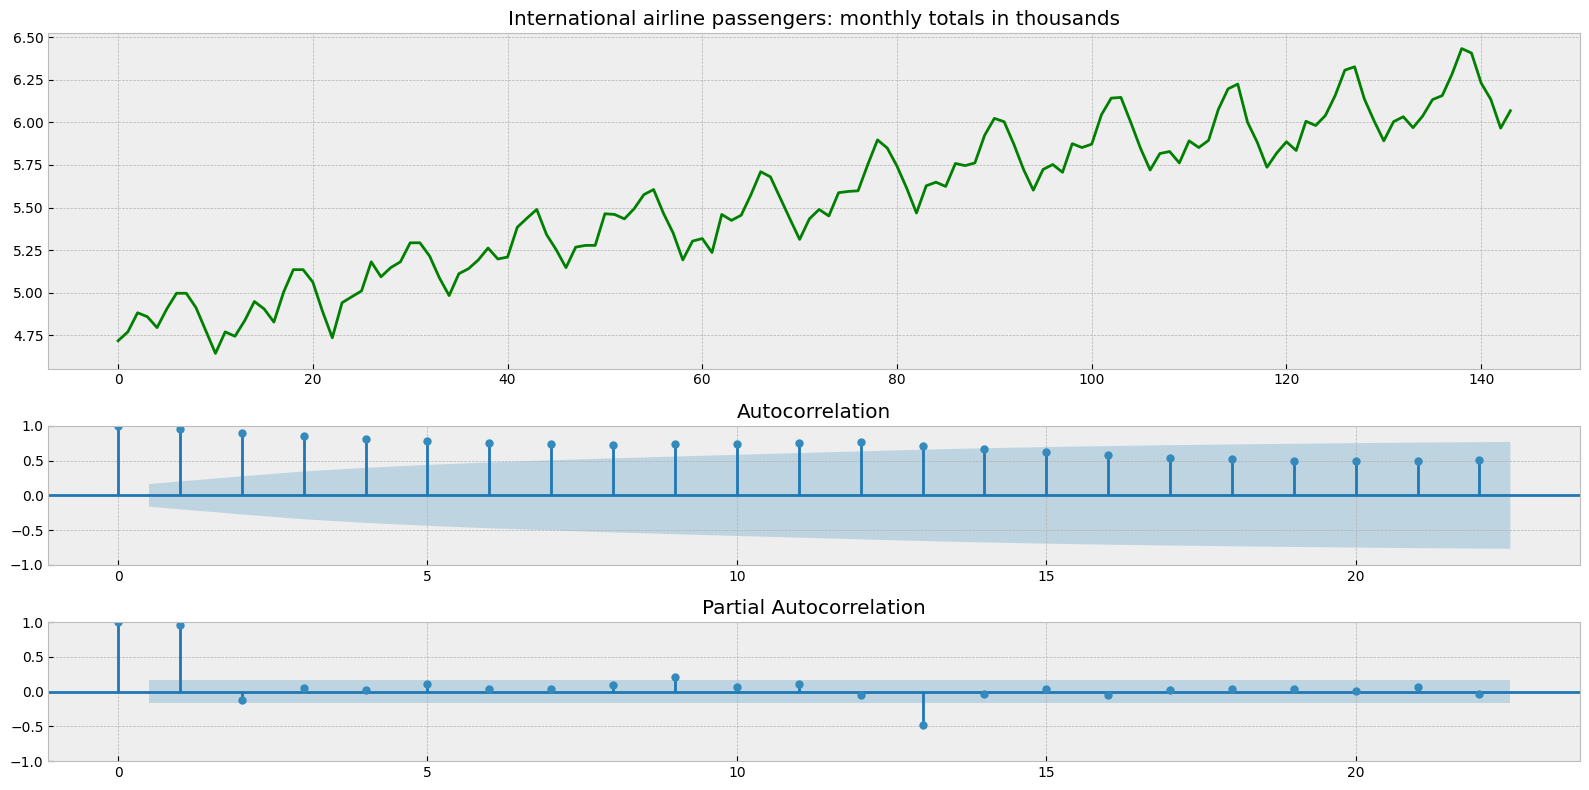

In [ ]:
# Убираем изменение дисперсии с помощью преобразования Бокса-Кокса
series = boxcox(series, 0)
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


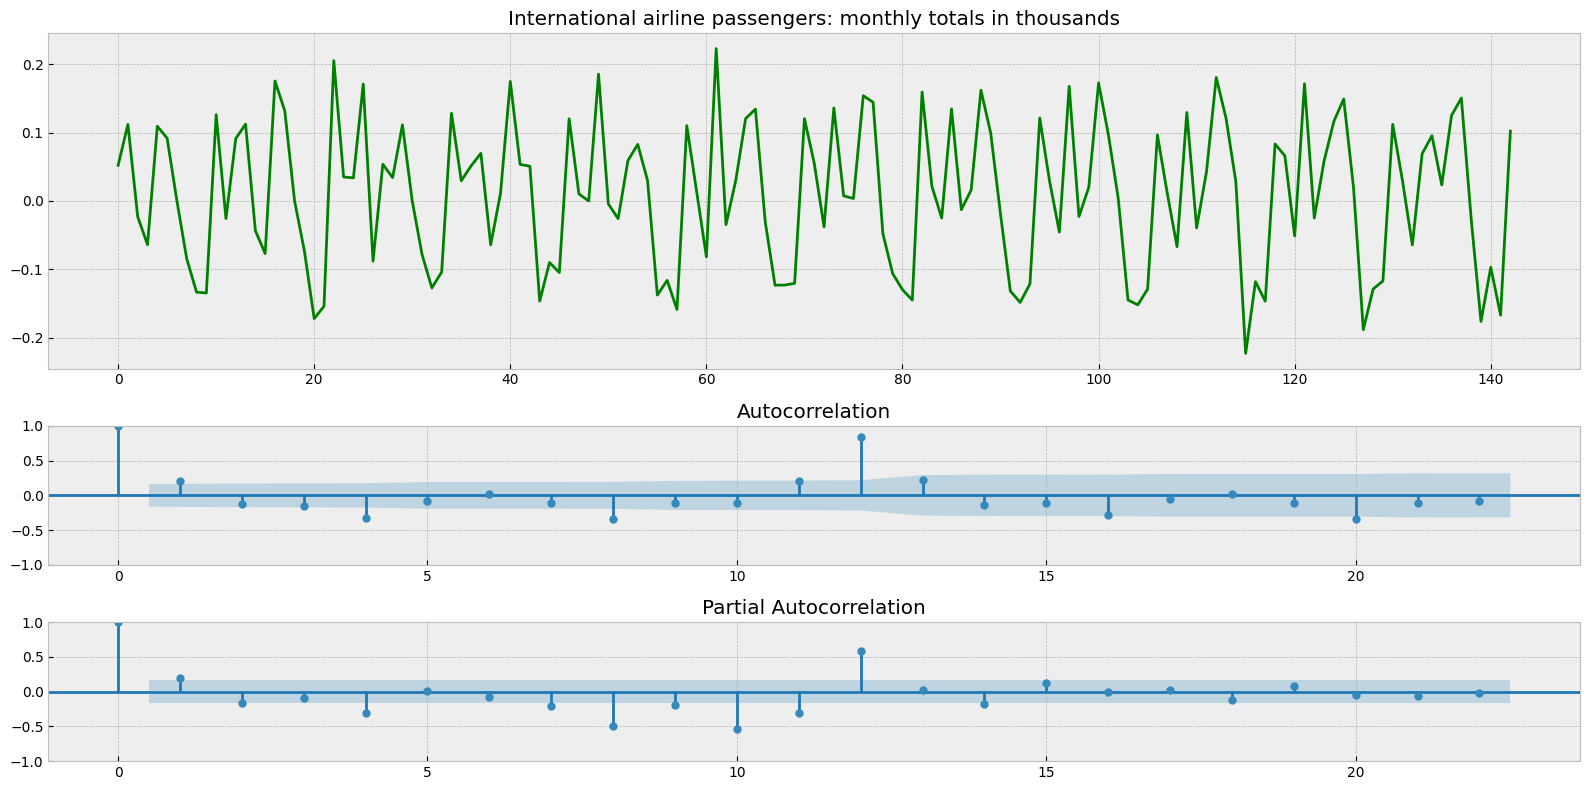

In [ ]:
# Убираем тренд дифференцированием
series = series[1:] - series[:-1]
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


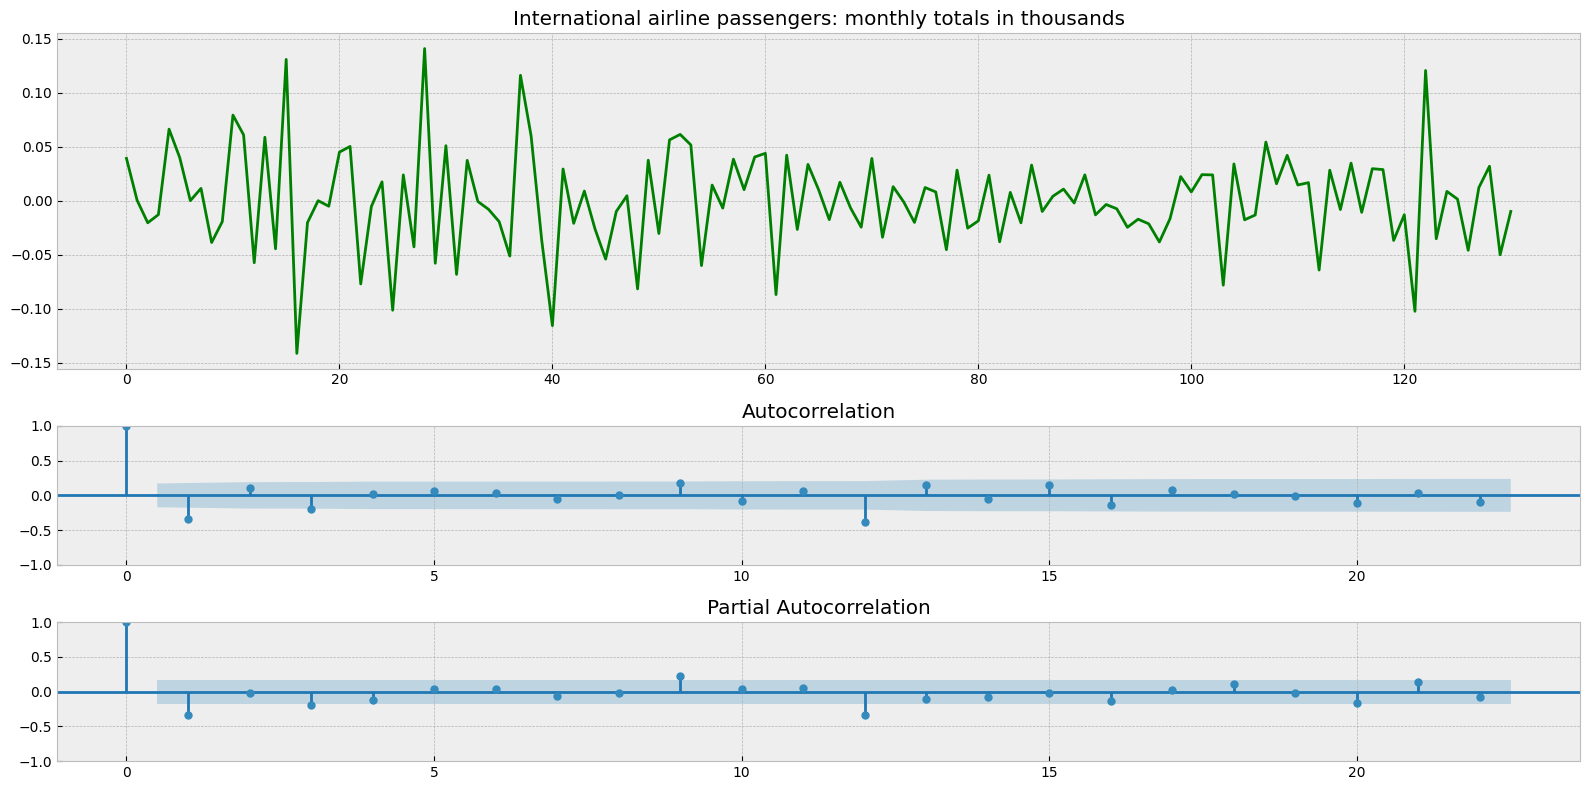

In [ ]:
# Убираем сезонность (12 месяцев)
series = series[12:] - series[:-12]
tsplot(series, name)

Ряд стал стационарным после преобразования Бокса-Кокса, дифференцирования и сезонного дифференцирования

## 4).mean-monthly-air-temperature-deg.csv

In [ ]:
mean_monthly_temp

,Month,Deg
0,1920-01,40.6
1,1920-02,40.8
2,1920-03,44.4
3,1920-04,46.7
4,1920-05,54.1
...,...,...
235,1939-08,61.8
236,1939-09,58.2
237,1939-10,46.7
238,1939-11,46.6


Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


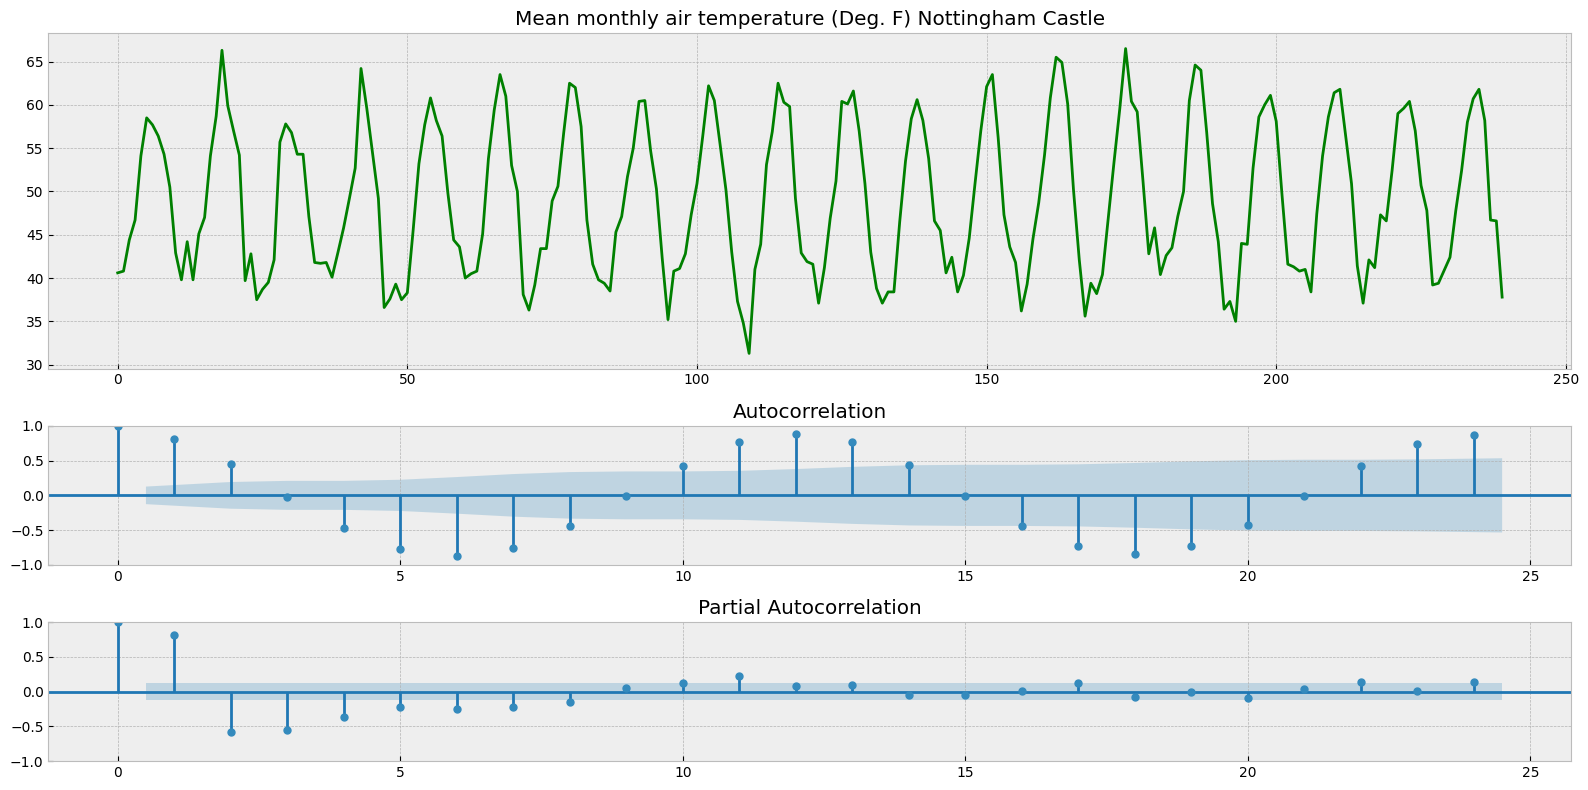

In [ ]:
name = 'Mean monthly air temperature (Deg. F) Nottingham Castle'
series = mean_monthly_temp['Deg']
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                  -3.760996
p-value                          0.003333
#Lags Used                      15.000000
Number of Observations Used    224.000000
Critical Value (1%)             -3.459885
Critical Value (5%)             -2.874531
Critical Value (10%)            -2.573694
dtype: float64


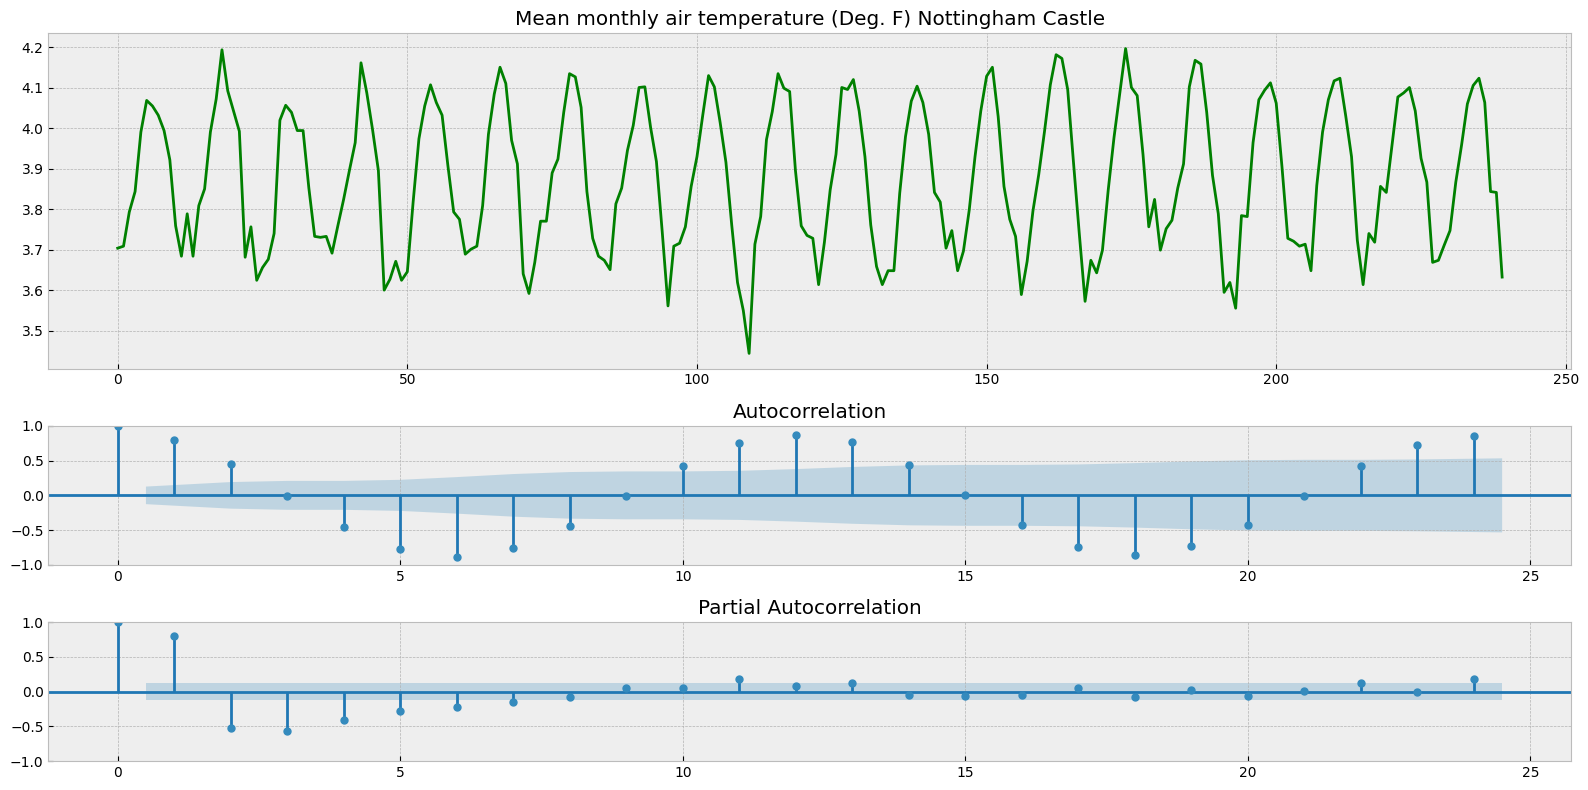

In [ ]:
# Убираем изменение дисперсии с помощью преобразования Бокса-Кокса
series = boxcox(series, 0)
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


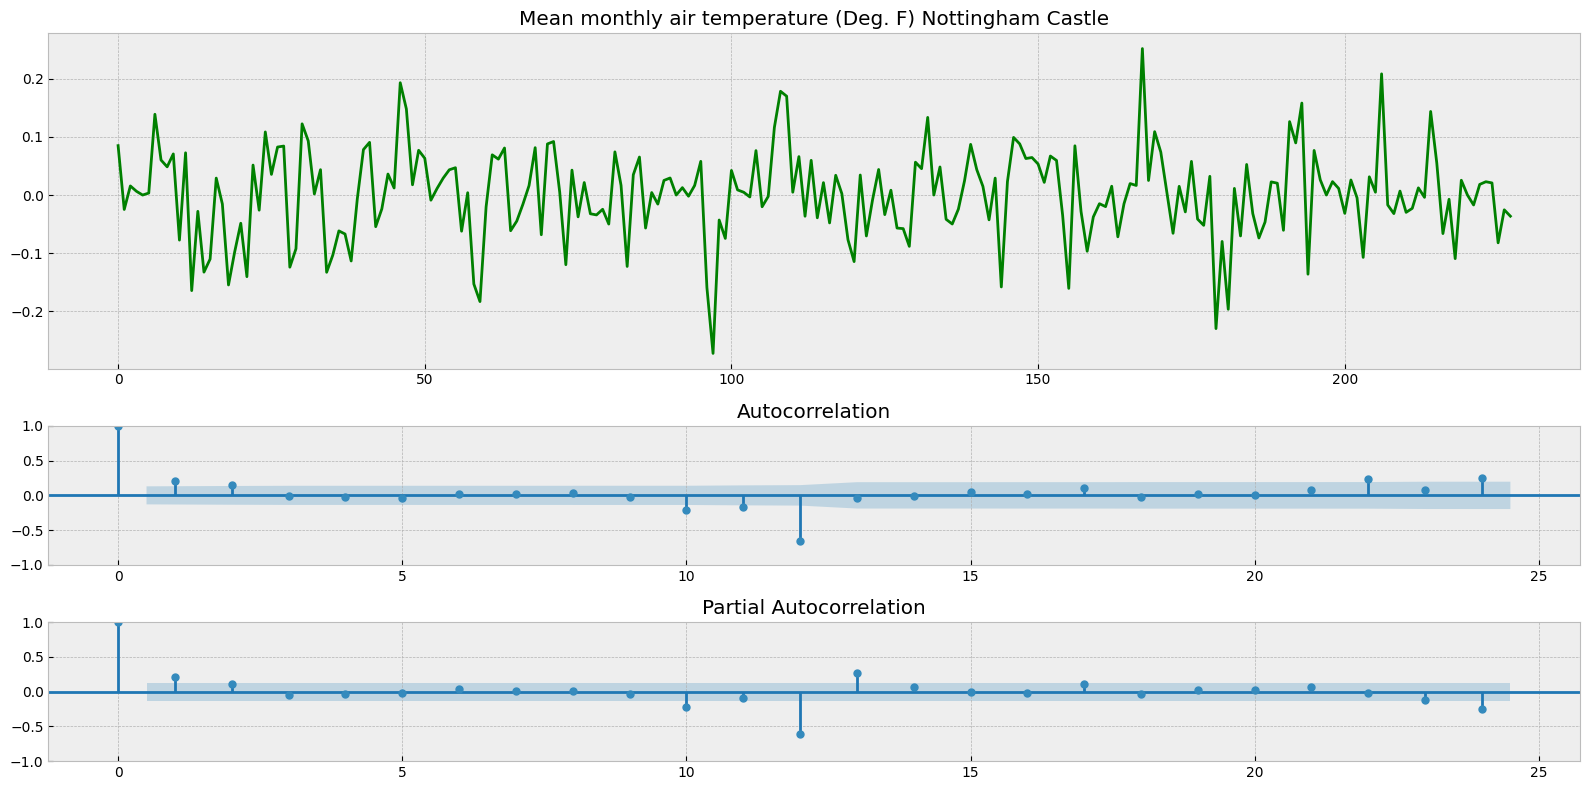

In [ ]:
# Убираем сезонность (12 месяцев)
series = series[12:] - series[:-12]
tsplot(series, name)

Ряд стал стационарным после преобразования Бокса-Кокса и сезонного дифференцирования

## 5).weekly-closings-of-the-dowjones-.csv

In [ ]:
dowjones_closing

,Week,Close
0,1971-W27,890.19
1,1971-W28,901.80
2,1971-W29,888.51
3,1971-W30,887.78
4,1971-W31,858.43
...,...,...
157,1974-W28,791.77
158,1974-W29,787.23
159,1974-W30,787.94
160,1974-W31,784.57


Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


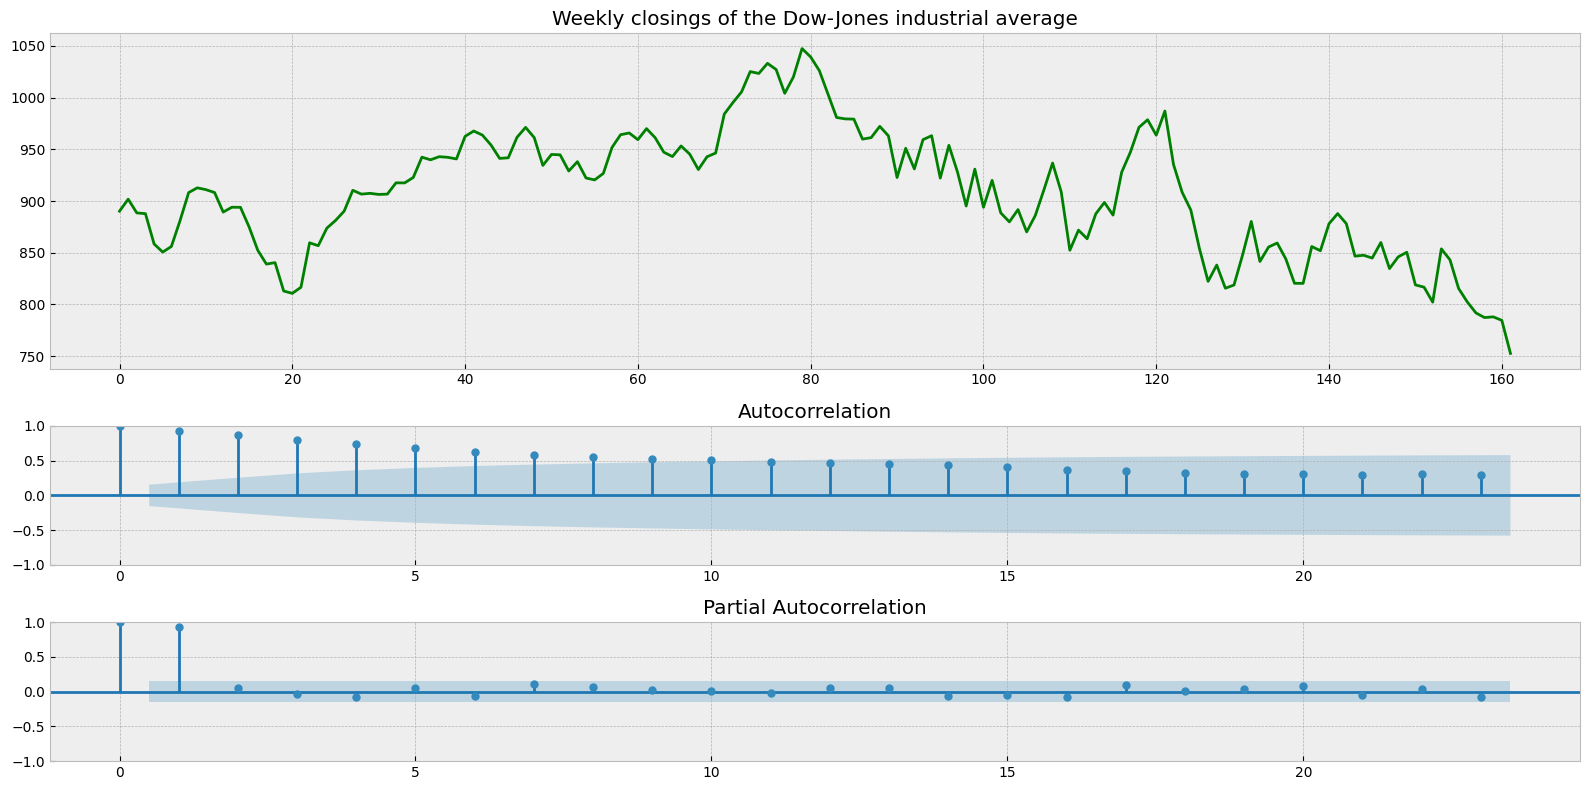

In [ ]:
name = 'Weekly closings of the Dow-Jones industrial average'
series = dowjones_closing['Close']
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                  -1.210369
p-value                          0.669119
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


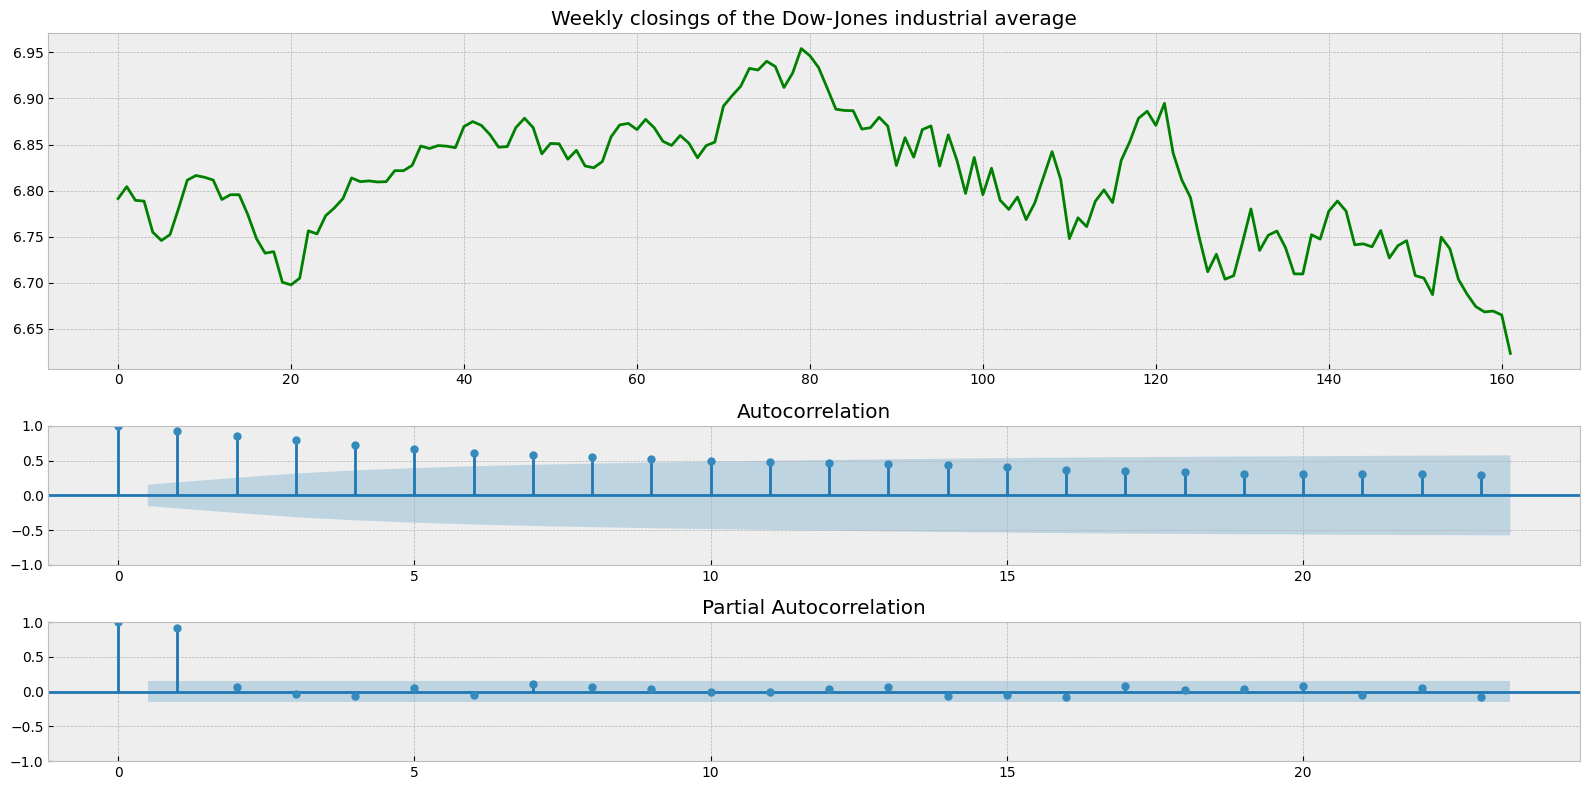

In [ ]:
# Убираем изменение дисперсии с помощью преобразования Бокса-Кокса
series = boxcox(series, 0)
tsplot(series, name)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


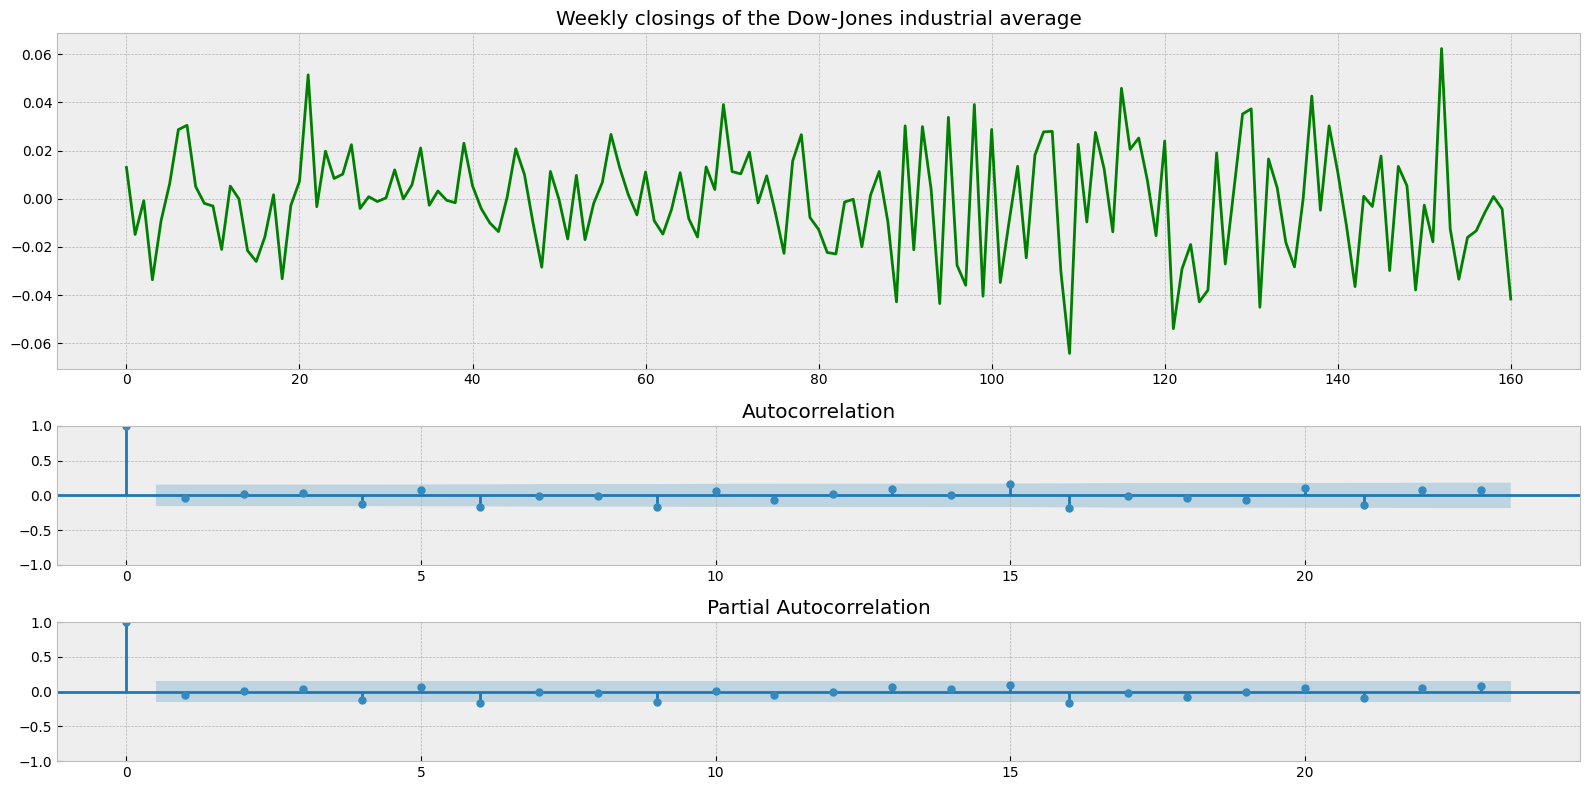

In [ ]:
# Убираем тренд дифференцированием
series = series[1:] - series[:-1]
tsplot(series, name)

Временной ряд стал стационарным после преобразования Бокса-Кокса и дифференцирования

## 6).daily-total-female-births-in-cal.csv

In [ ]:
female_births

,Date,Count
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


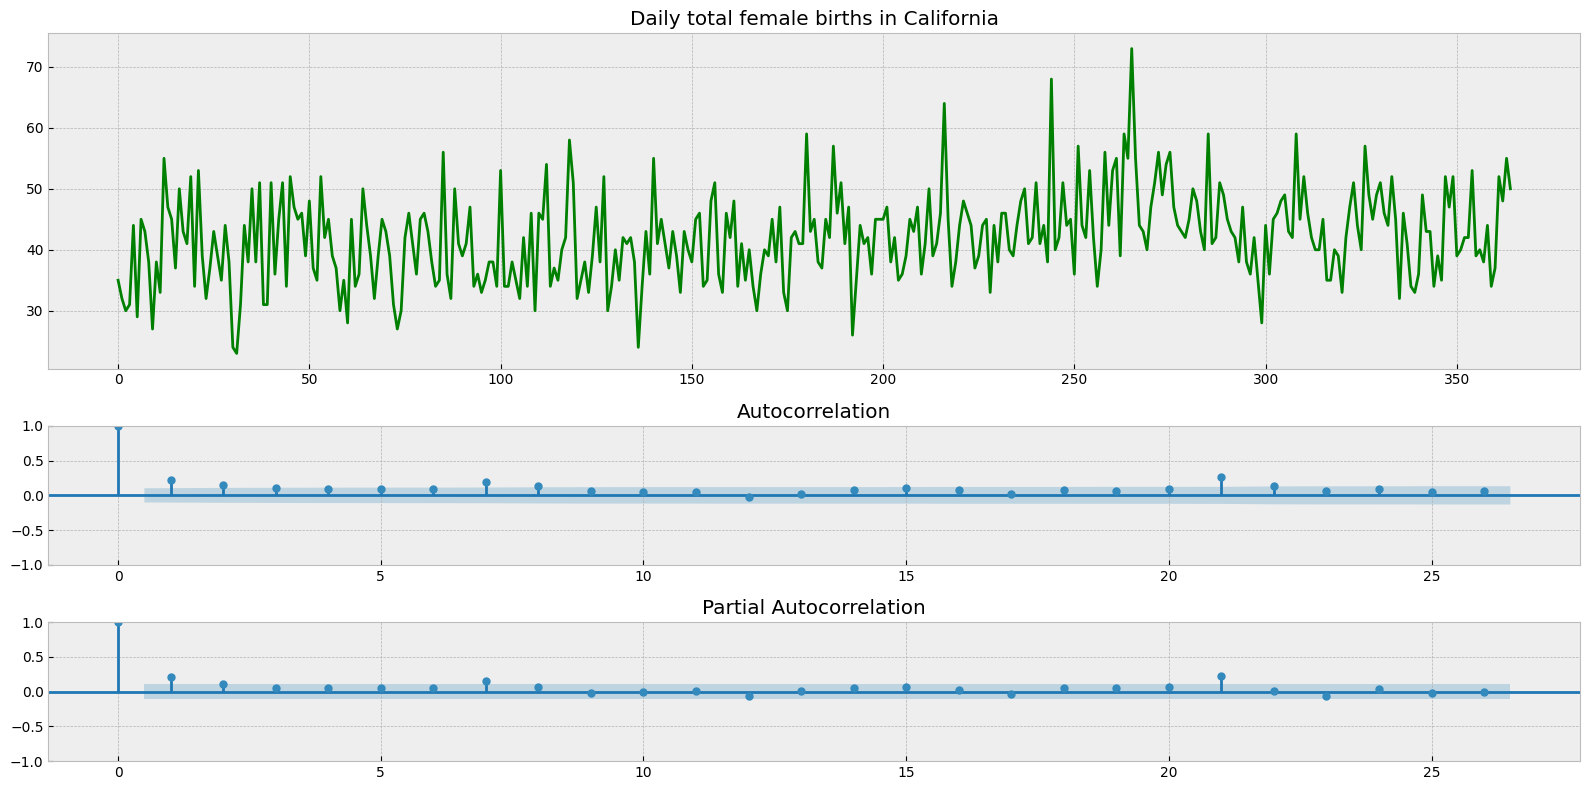

In [ ]:
name ='Daily total female births in California'
series = female_births['Count']
tsplot(series, name)

Временной ряд уже является стационарным, преобразования не требуются